In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import firwin, lfilter
from tqdm import tqdm

In [3]:
M = 210
n = np.arange(M)

Fs = 1000 #frecuencia de muestreo
Ts = 1/Fs # periodo de muestreo a 1ms

F1 = 40 #frecuencia 1
T1 = 1/F1
F2 = 250 #frecuencia 2
T2 = 1/F2

x1 = np.sin(2*np.pi*F1*n/Fs)
x2 = np.sin(2*np.pi*F2*n/Fs)

x = x1+x2

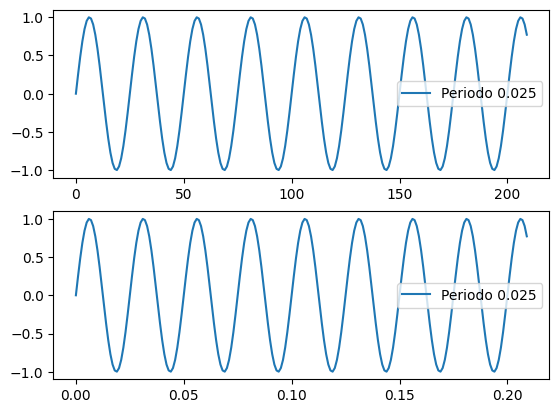

In [4]:
#eje de tiempo en seg
t = n/Fs

fig,axes = plt.subplots(2)
axes[0].plot(n,x1,label=f"Periodo {T1}")
axes[0].legend()

axes[1].plot(t,x1,label=f"Periodo {T1}")
axes[1].legend()

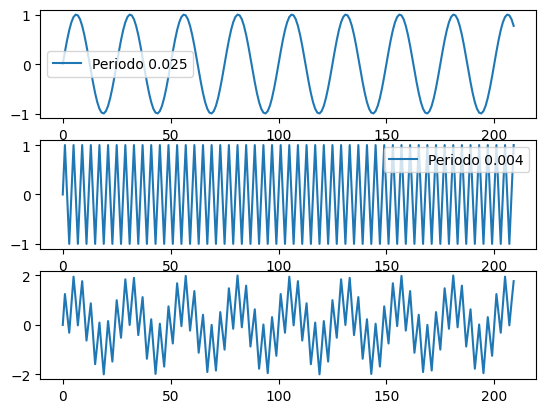

In [5]:
fig,axes = plt.subplots(3)
axes[0].plot(n,x1,label=f"Periodo {T1}")
axes[0].legend()
axes[1].plot(n,x2,label=f"Periodo {T2}")
axes[1].legend()
axes[2].plot(n,x)

## DFT de N puntos

In [20]:
#transformada de fourier FFT
N = 1024
X = np.fft.fft(x,N)
print(X.shape)

X = X[0:(N//2)]

(1024,)


In [7]:
#magnitud
Xm = np.abs(X)
Xm = np.round(Xm,3)

#frecuencias
F = np.linspace(0, Fs/2, N//2)

#eje de tiempo en seg
t = n/Fs

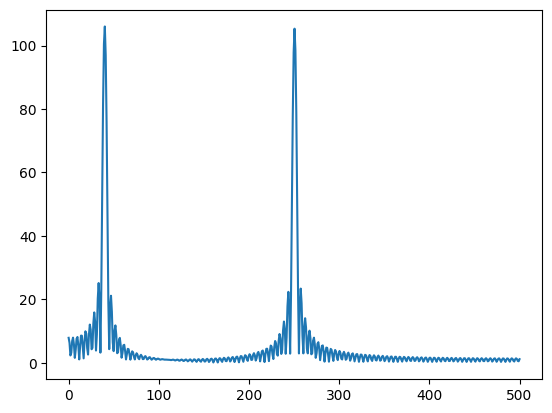

In [8]:
plt.plot(F,Xm)

## Diseñar el filtro FIR pasa bajos

In [9]:
#longitud de la ventana
M = 37
#frecuencia de corte en Hz
Fc = 200

#Frecuencia de corte en radianes
wc = 2*np.pi*Fc/Fs

# filtro fir
w = firwin(numtaps=M, cutoff=Fc, window='hamming', fs=Fs)
w = np.round(w,3)

In [10]:
nm = np.arange(M)
W = np.fft.fft(w,N)
W = np.round(W[0:N//2],3)

#magnitud
Wm = np.abs(W)
Rx = Fc*np.ones([N//2])
Ry = np.linspace(0,1,N//2)

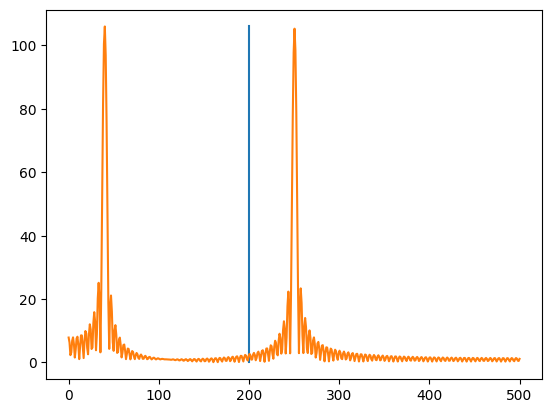

In [11]:
Ry = np.linspace(0,np.max(Xm),N//2) #el eje y

plt.plot(Rx,Ry)
plt.plot(F,Xm)

### Aplicación del filtro FIR a la entrada x

In [12]:
y = lfilter(w, np.array(1),x)
Y = np.fft.fft(y,N)
Y = np.round(Y[0:N//2],3)

Ym = np.abs(Y)


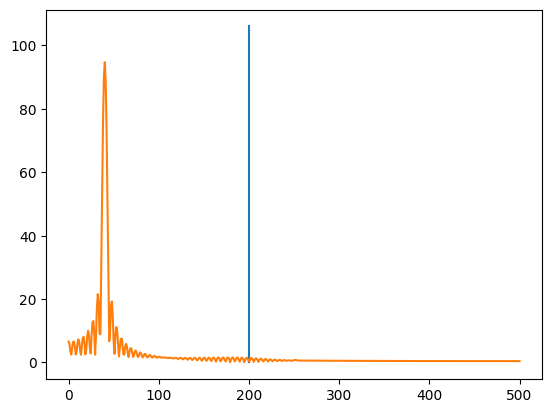

In [13]:
Ry = np.linspace(0,np.max(Xm),N//2) #el eje y

plt.plot(Rx,Ry)
plt.plot(F,Ym)

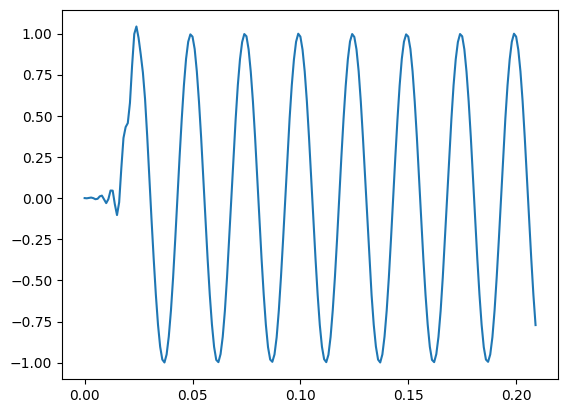

In [14]:
plt.plot(t,y)

In [15]:
periodo = 0.0420 - 0.0160
"Periodo de la señal: %.3f"%periodo

'Periodo de la señal: 0.026'

# pruebas con entradas

In [16]:
xx = np.array([10,20,30,40,40,30,20,10])

yy = lfilter(w,np.array(1),xx)
yy = np.round(yy,3)

In [17]:
print("orden del filtro:",M)
print("Coeficientes del filtro:\n")

for h in w:
    print(h)

orden del filtro: 37
Coeficientes del filtro:

-0.001
0.001
0.002
-0.0
-0.004
-0.004
0.005
0.011
-0.0
-0.018
-0.014
0.019
0.039
-0.0
-0.067
-0.058
0.091
0.3
0.4
0.3
0.091
-0.058
-0.067
-0.0
0.039
0.019
-0.014
-0.018
-0.0
0.011
0.005
-0.004
-0.004
-0.0
0.002
0.001
-0.001


In [18]:
print("Respuestas y ante x")
for k in range(len(xx)):
    print("y["+str(k)+"]: ",yy[k])

Respuestas y ante x
y[0]:  -0.01
y[1]:  -0.01
y[2]:  0.01
y[3]:  0.03
y[4]:  0.02
y[5]:  -0.03
y[6]:  -0.06
y[7]:  -0.0
